## Fitting Data with SciPy

### Simple Least Squares Fit
First lets try a simple least squares example using noisy data

In [1]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

# Print options
import numpy as np

In [2]:
from scipy import optimize

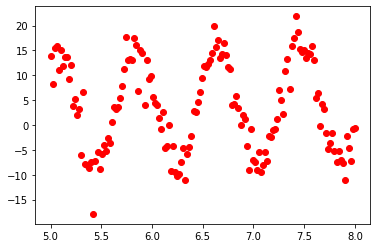

In [3]:
# Generate data points with noise
num_points = 150
Tx = np.linspace(5., 8., num_points)
tX = 11.86*np.cos(2*np.pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))

plt.plot(Tx,tX,"ro")

In [4]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function



[-11.89021558   0.80351218   1.40122702   0.59495828]


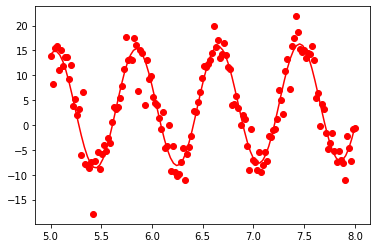

In [5]:
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))
print(p1)
time = np.linspace(Tx.min(), Tx.max(), 100)

plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

### Power Law Fit to error bars

In [6]:
# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

##########
# Generate data points with noise
##########
num_points = 20

# Note: all positive, non-zero data
xdata = np.linspace(1.1, 10.1, num_points)
ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
yerr = 0.2 * ydata                      # simulated errors (10%)

ydata += np.random.randn(num_points) * yerr       # simulated noisy data


<ErrorbarContainer object of 3 artists>

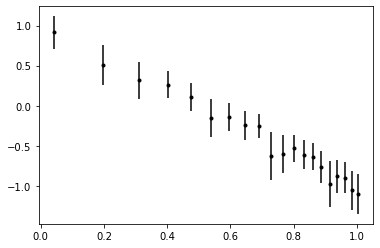

In [7]:
logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

plt.errorbar(logx, logy, yerr=logyerr, fmt='k.')  # Data

In [8]:
# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: np.power(y - fitfunc(p, x),2) / err

In [9]:
pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)
pfinal = out[0]
covar = out[1]
print (pfinal)
print (covar)
    
index = pfinal[1]
amp = 10.0**pfinal[0]

[ 1.01550361 -2.02262779]
[[ 1.00878548 -1.3231006 ]
 [-1.3231006   1.89224634]]


<ErrorbarContainer object of 3 artists>

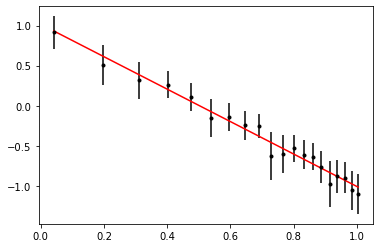

In [10]:
plt.plot(logx, fitfunc(pfinal, logx), color="red")     # Fit
plt.errorbar(logx, logy, yerr=logyerr, fmt='k.')  # Data

## Interpolation

In [11]:
from scipy import interpolate

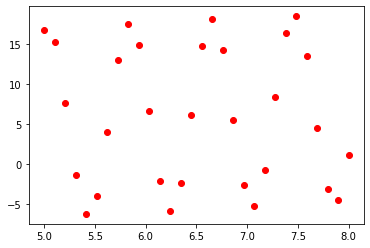

In [12]:
num_points = 30
Tx = np.linspace(5., 8., num_points)
tX = 11.86*np.cos(2*np.pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5))
plt.plot(Tx,tX,"ro")

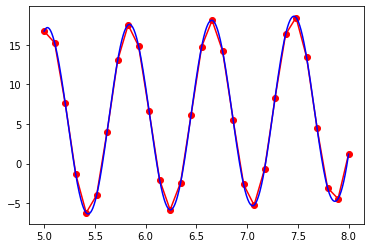

In [13]:
# We can use these points as an interpolation grid
interp_grid_lin = interpolate.interp1d(Tx,tX, kind="linear")
interp_grid_cub = interpolate.interp1d(Tx,tX, kind="cubic")

#lets use this to draw the results
px = np.linspace(5., 8., 1000)
interp_points_lin = interp_grid_lin(px)
interp_points_cub = interp_grid_cub(px)


plt.plot(Tx,tX,"ro")
plt.plot(px,interp_points_lin,"r-")
plt.plot(px,interp_points_cub,"b-")

##  Interpolation in more dimensions

So far so uninteresting, but we can interpolate in more diminsions

In [14]:
from scipy import stats, random

In [15]:
num_points=10
x = np.linspace(-1,1, num_points)
y = np.linspace(-1,1, num_points)

X,Y = np.meshgrid(x,y)
r = np.sqrt(X.ravel() * X.ravel() + Y.ravel() * Y.ravel())
weight = stats.norm.pdf(r)
weight = weight.reshape(num_points, num_points)
print(weight.shape)

(10, 10)


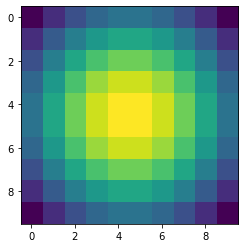

In [16]:
plt.imshow(weight, interpolation="None")

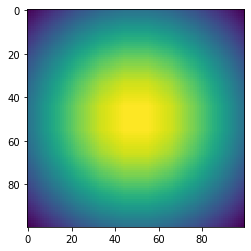

In [17]:
# Lets try creating a grid interpolator
grid_interp = interpolate.RegularGridInterpolator((x,y), weight)

xi = np.linspace(-1,1, num_points*10)
yi = np.linspace(-1,1, num_points*10)

Xi, Yi = np.meshgrid(xi, yi)
interp_w = grid_interp((Xi.ravel(), Yi.ravel()))
interp_w = interp_w.reshape(num_points*10, num_points*10)
plt.imshow(interp_w, interpolation="None")

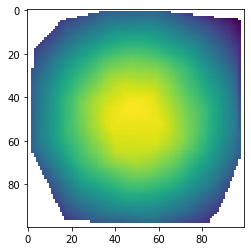

In [21]:
# Data need not be on a grid though
x = (random.rand(num_points*num_points) * 2) - 1
y = (random.rand(num_points*num_points) * 2) - 1

r = np.sqrt(x*x +y*y)
weight = stats.norm.pdf(r)

lin_ND_interp = interpolate.LinearNDInterpolator((x,y), weight)
interp_ND_w = lin_ND_interp((Xi.ravel(), Yi.ravel()))
interp_ND_w = interp_ND_w.reshape(num_points*10, num_points*10)
plt.imshow(interp_ND_w, interpolation="None")

## Integration

In [22]:
from scipy import integrate

In [23]:
# Lets just try integrating a gaussian
gaus = lambda x: stats.norm.pdf(x)
integral = integrate.quad(gaus, -2, 2)
print(integral)

(0.9544997361036417, 1.8403548653972355e-11)


## Exercises

Define the power-law spectrum of the Crab Nebula and integrate it in the energy range between 100 GeV and 100 TeV